# Taxi Data Analysis Notebook

This notebook contains exploratory data analysis (EDA) of a taxi dataset. The aim is to visualize and understand patterns related to rides, fares, and other relevant features.

## 1. Imports

We begin by importing the necessary libraries for data manipulation and visualization:

```python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Taxi Data Analysis Documentation

## 1. Data Loading and Overview

In this section, we load the taxi dataset and perform an initial overview to understand its structure and contents.

### 1.1 Load the Dataset

We use Seaborn to load the taxi dataset:



In [17]:
df = sns.load_dataset('taxis')

### 1.2 Check the Shape of the DataFrame


In [20]:
rows, cols = df.shape

In [22]:
print(f"Number of rows {rows}")
print(f"Number of columns {cols}")

Number of rows 6433
Number of columns 14


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [26]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [42]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


## 2. Missing Values Analysis

In this section, we analyze the missing values present in the dataset.

### 2.1 Calculate Missing Values Percentage

First, we calculate the percentage of missing values for each column in the DataFrame:

In [44]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [31]:
missing_values_percentage = df.isnull().sum().sort_values(ascending=False) / len(df)*100
missing_values_percentage

dropoff_zone       0.699518
dropoff_borough    0.699518
payment            0.683973
pickup_zone        0.404166
pickup_borough     0.404166
pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
dtype: float64

### Heatmap for missing values

<Axes: >

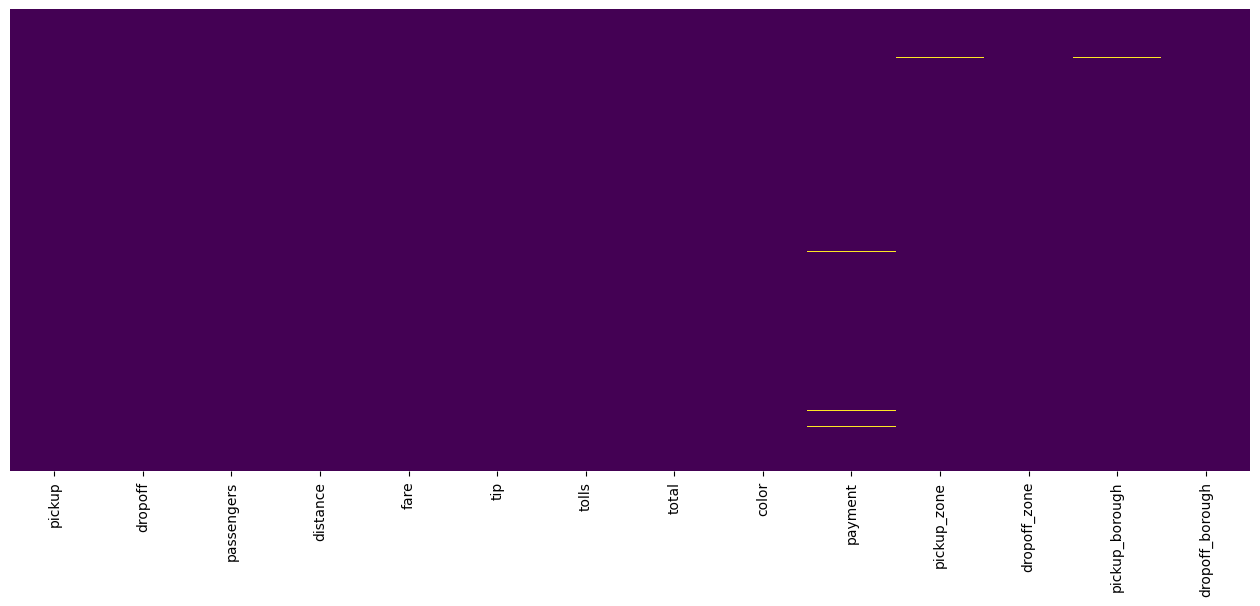

In [48]:
# make a figure size
plt.figure(figsize=(16, 6))
#plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Bar chart for missing values in percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

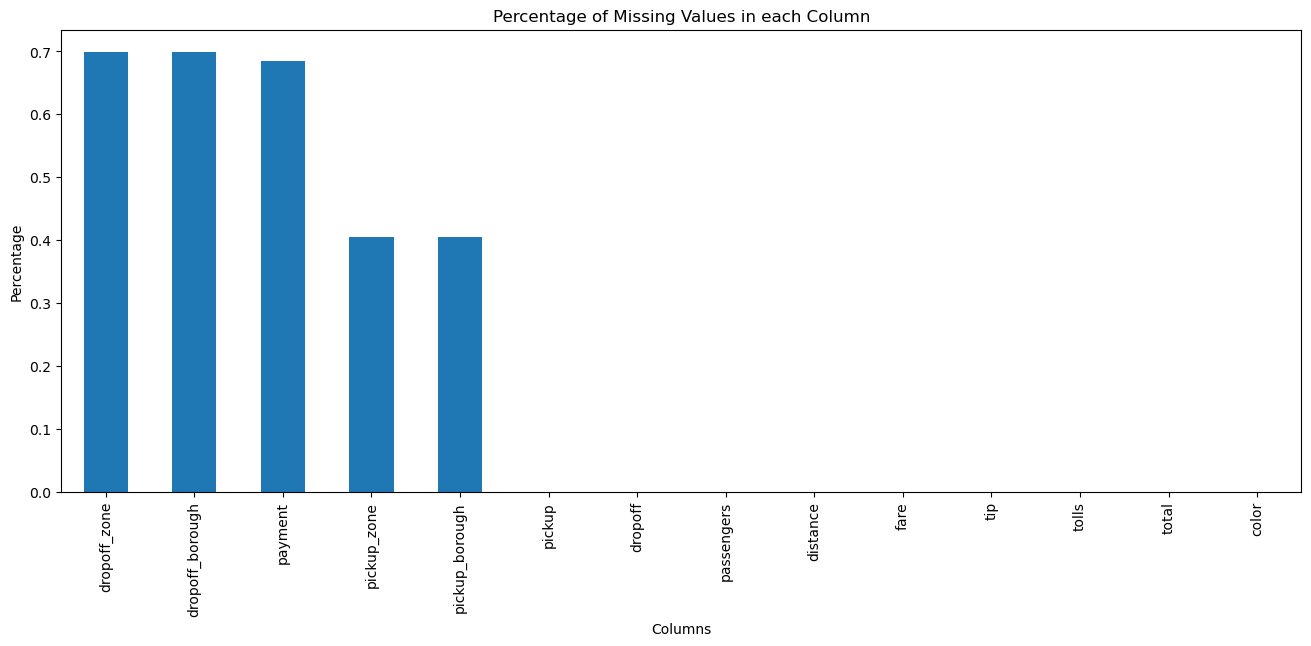

In [51]:
plt.figure(figsize=(16, 6))
missing_values_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

### Dropping null values as they are <1 % of the data. 

In [54]:
df = df.dropna()

In [56]:
df.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [58]:
len(df)

6341

## Type Casting the datetime fields

In [306]:
df['pickup'] = pd.to_datetime(df['pickup'])
df['dropoff'] = pd.to_datetime(df['dropoff'])

### Checking Outliers and Correlations

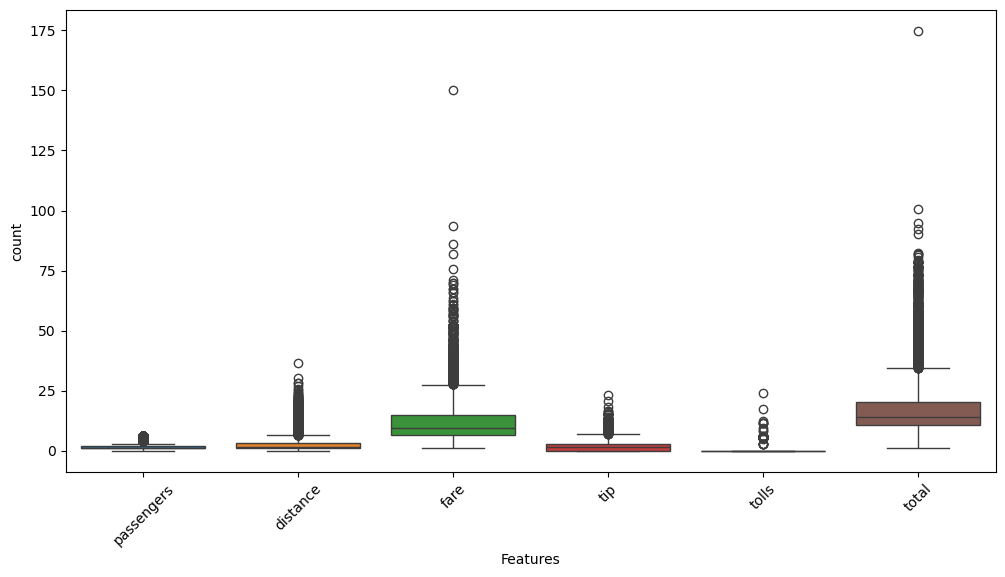

In [309]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xlabel('Features')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

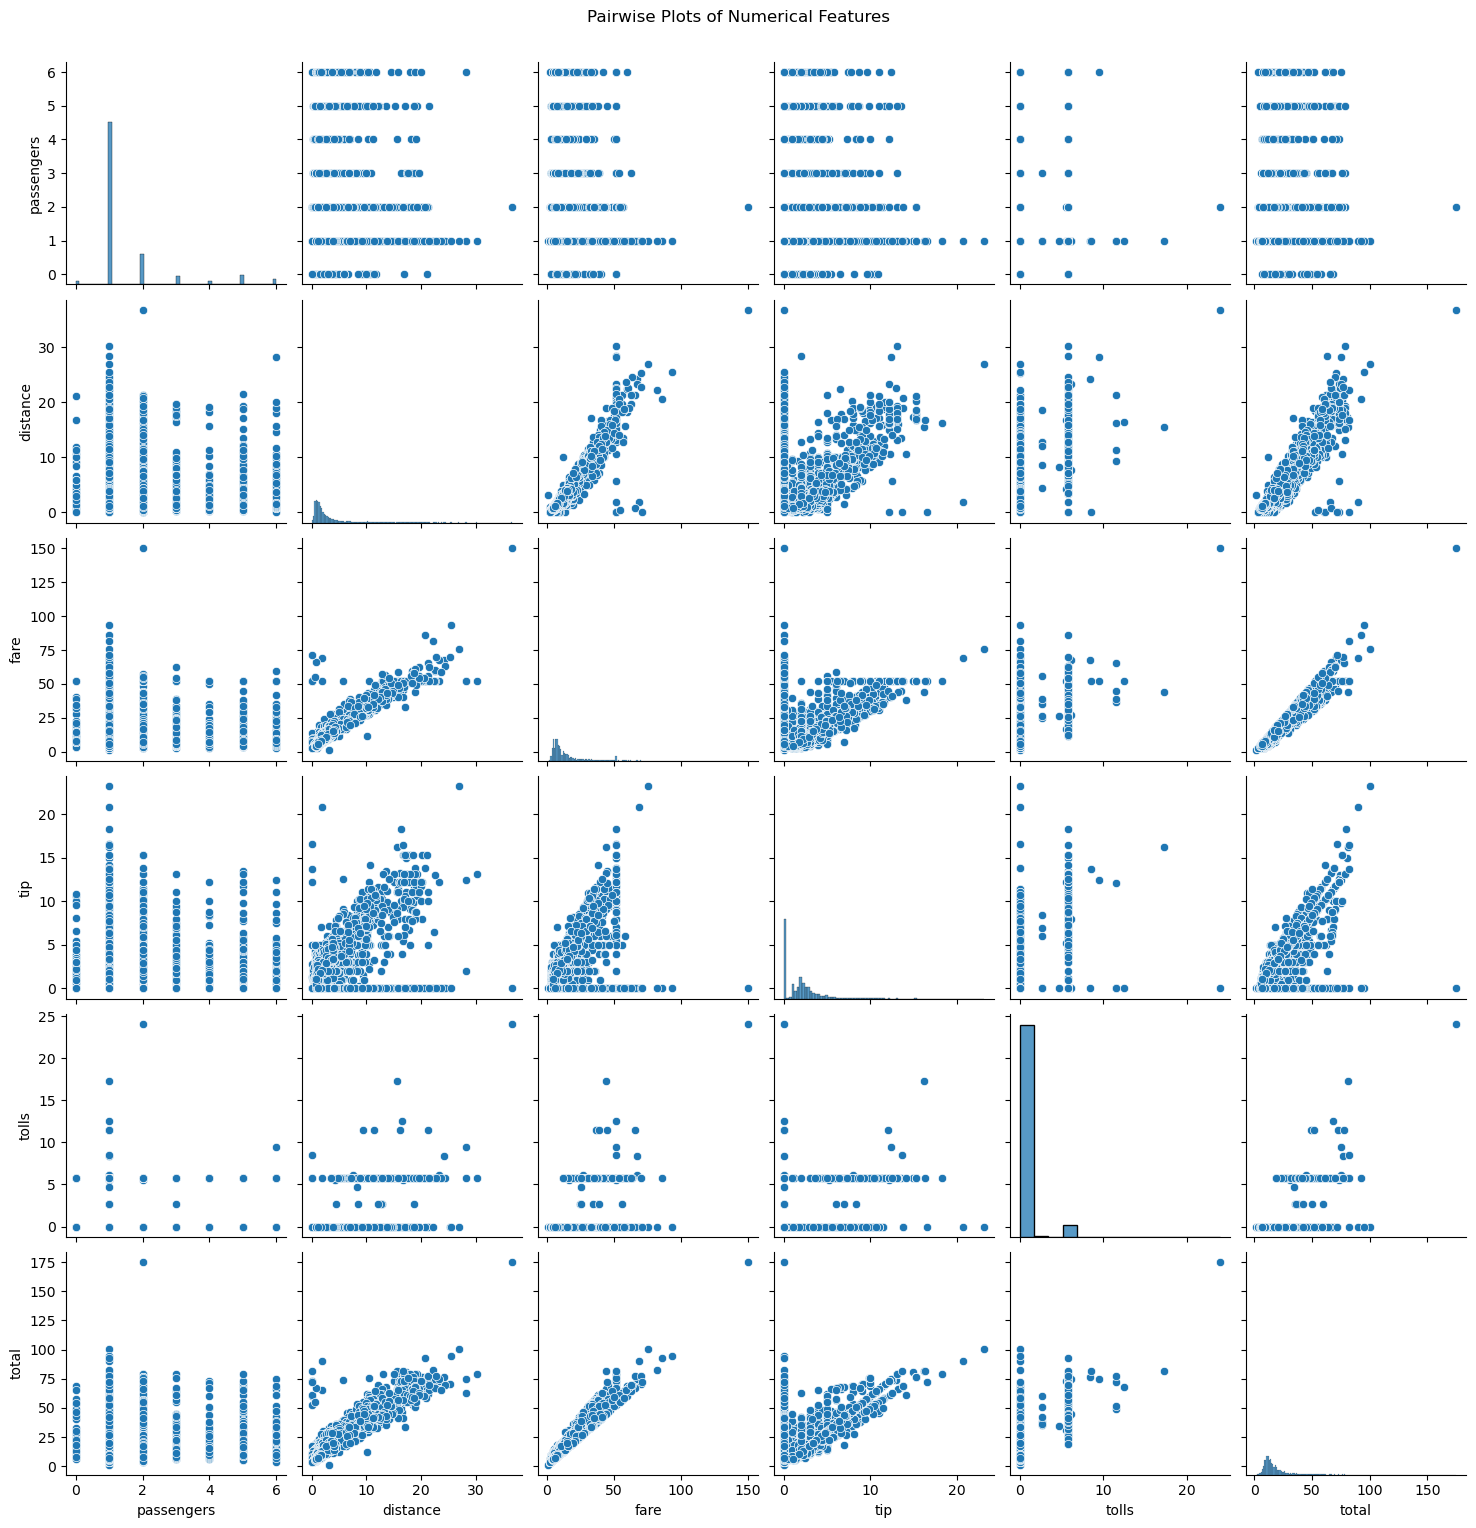

In [310]:
sns.pairplot(df.select_dtypes(np.number))
plt.suptitle('Pairwise Plots of Numerical Features', y=1.02)
plt.show()

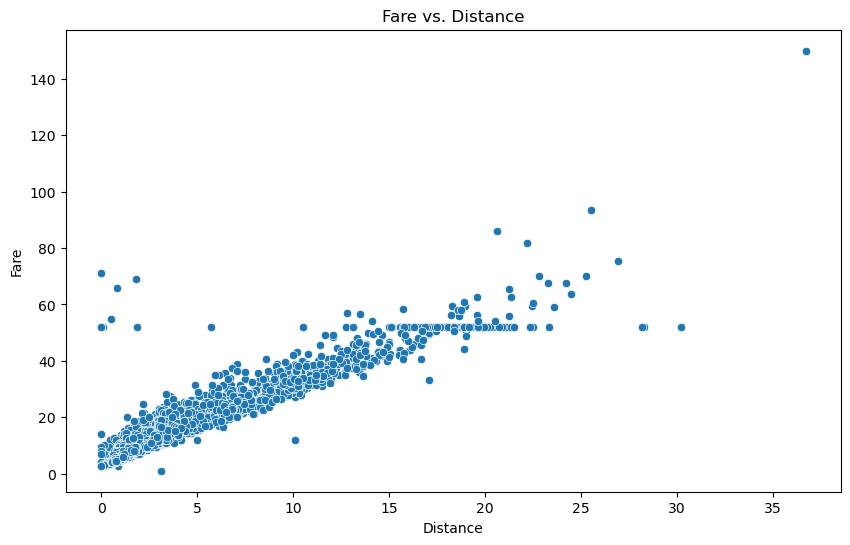

In [311]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='fare', data=df)
plt.title('Fare vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

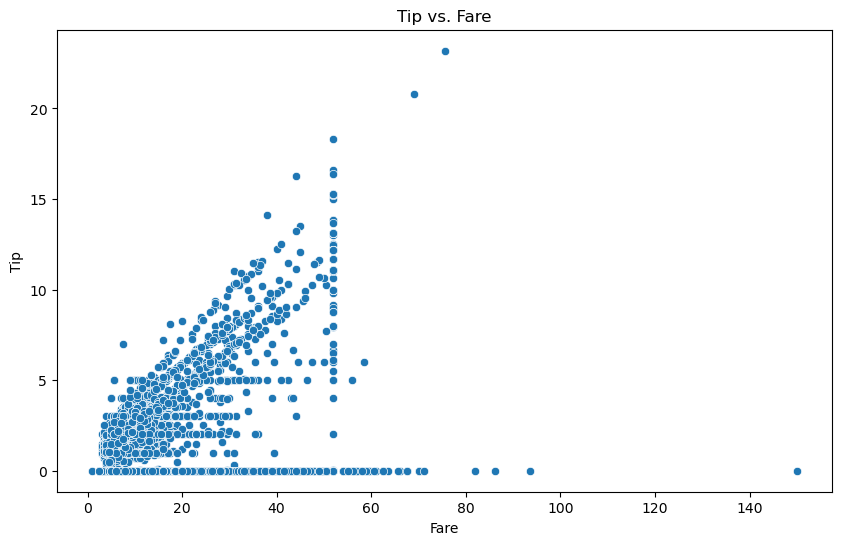

In [312]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare', y='tip', data=df)
plt.title('Tip vs. Fare')
plt.xlabel('Fare')
plt.ylabel('Tip')
plt.show()

<Axes: >

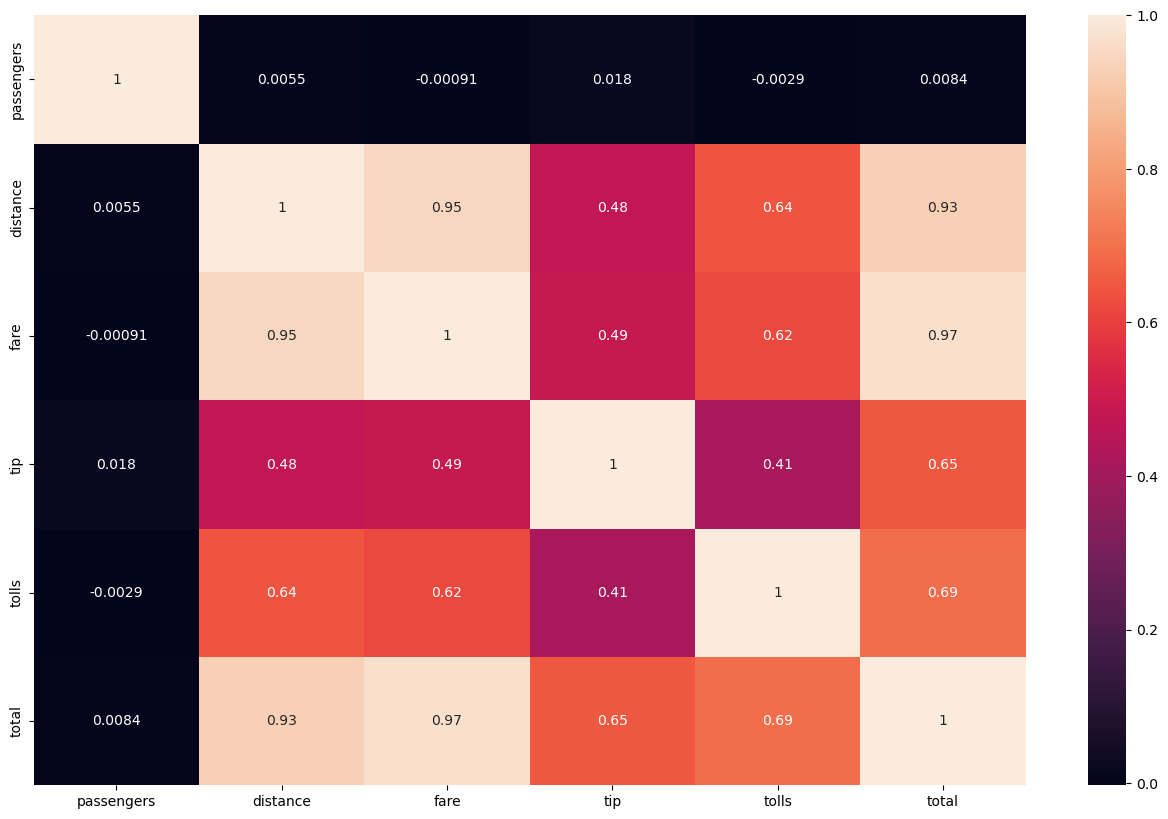

In [313]:
plt.figure(figsize=(16, 10)) # make figure size  
sns.heatmap(df.select_dtypes(np.number).corr(), annot=True) 

### Distance vs fare Comparison

<Axes: >

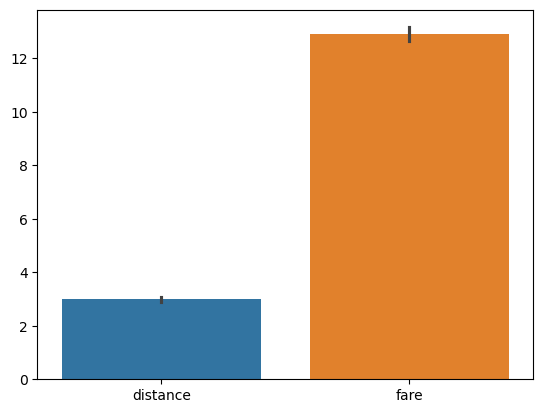

In [318]:
sns.barplot(data=df[['distance', 'fare']])

### Distance vs tip Comparison

<Axes: >

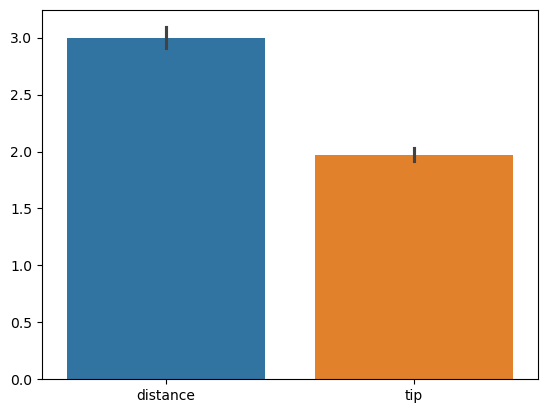

In [321]:
sns.barplot(data=df[['distance', 'tip']])

### Demand distribution in different boroughs

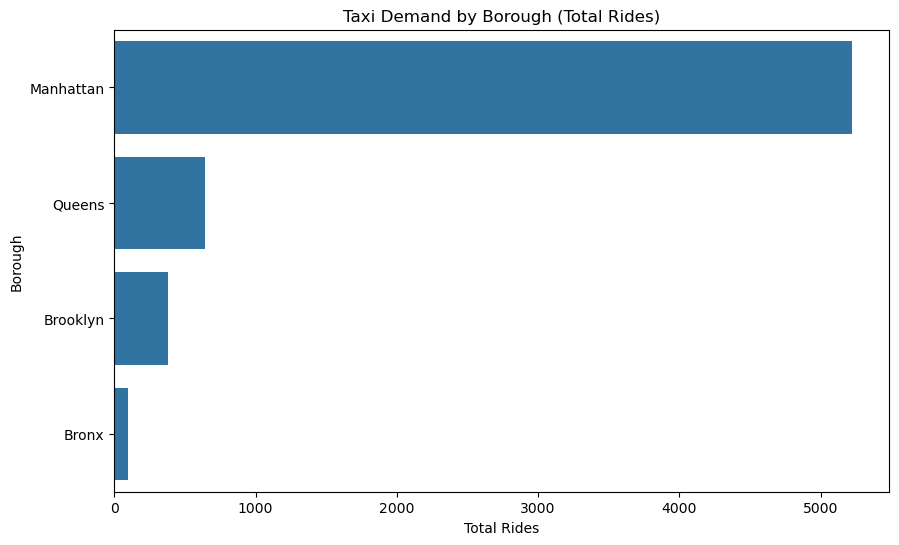

In [323]:
demand_by_borough = df['pickup_borough'].value_counts().reset_index()
demand_by_borough.columns = ['Borough', 'Total Rides']

demand_by_borough = demand_by_borough.sort_values(by='Total Rides', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Rides', y='Borough', data=demand_by_borough)
plt.title('Taxi Demand by Borough (Total Rides)')
plt.xlabel('Total Rides')
plt.ylabel('Borough')
plt.show()

### Number of rides per hour

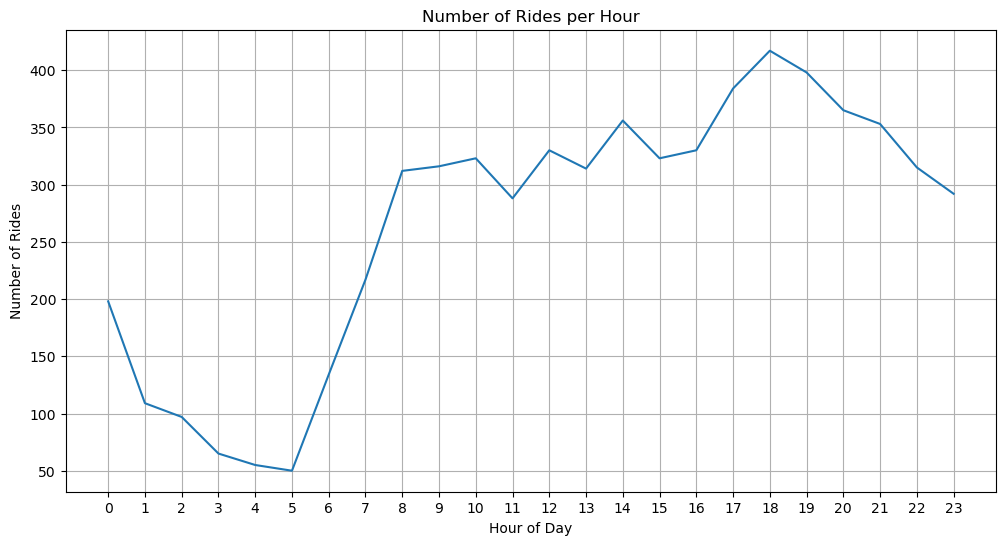

In [325]:
df['pickup_hour'] = df['pickup'].dt.hour

# Count rides per hour
rides_per_hour = df['pickup_hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=rides_per_hour.index, y=rides_per_hour.values)
plt.title('Number of Rides per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

### Average fare over time

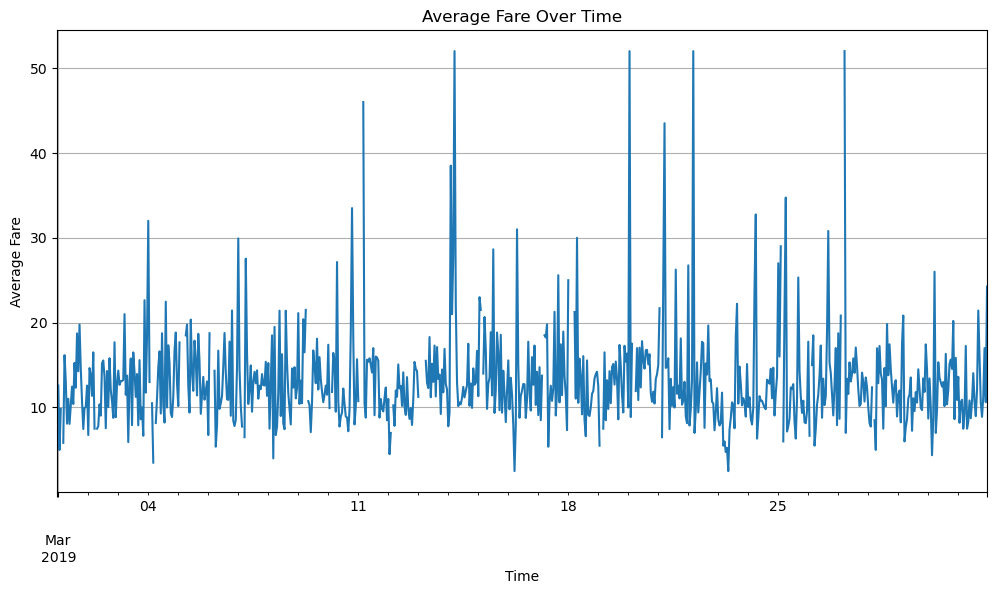

In [327]:
df.set_index('pickup', inplace=True)

mean_fare_per_hour = df['fare'].resample('H').mean()

plt.figure(figsize=(12, 6))
mean_fare_per_hour.plot()
plt.title('Average Fare Over Time')
plt.xlabel('Time')
plt.ylabel('Average Fare')
plt.grid()
plt.show()


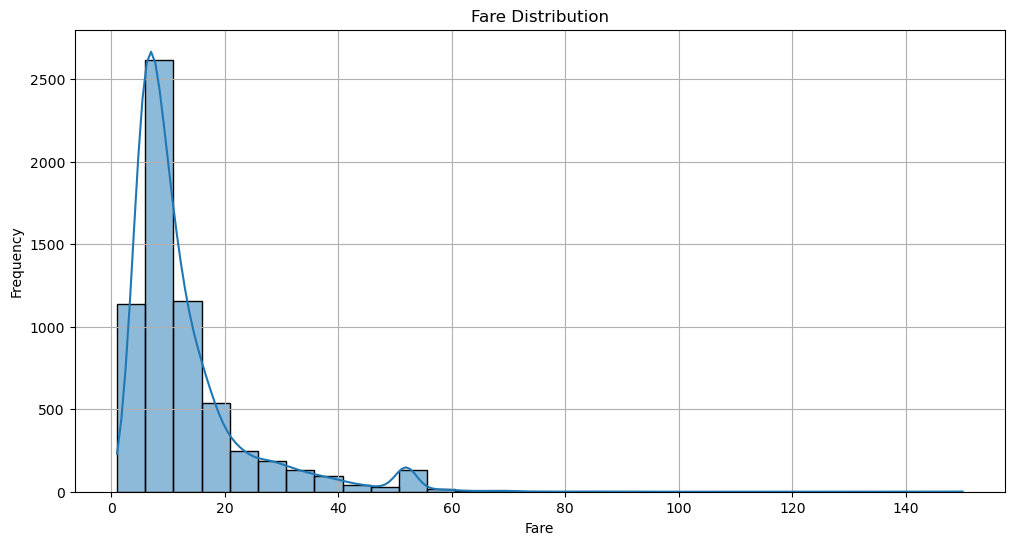

In [328]:
plt.figure(figsize=(12, 6))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid()
plt.show()

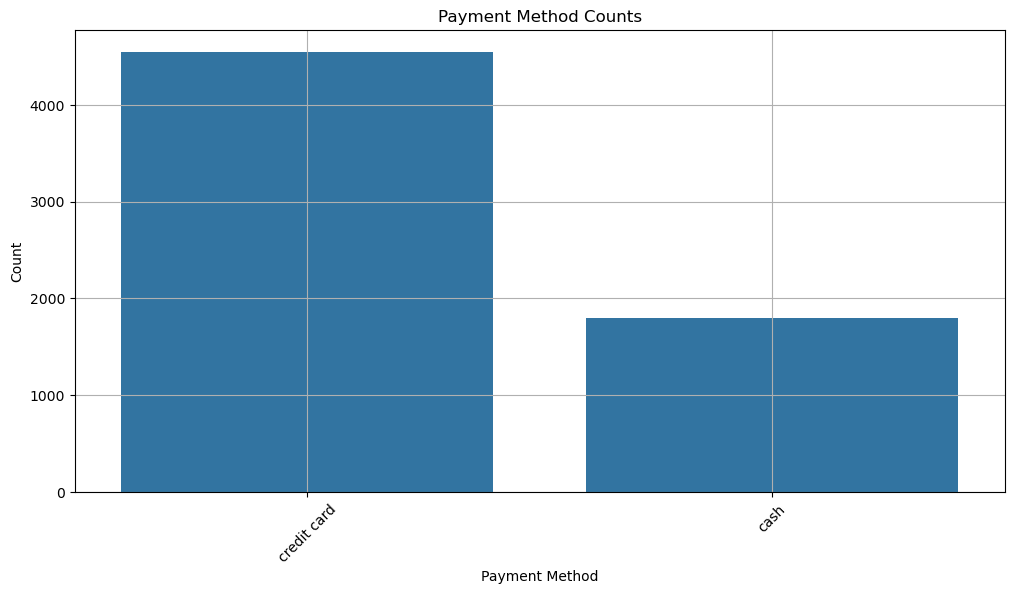

In [330]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='payment', order=df['payment'].value_counts().index)
plt.title('Payment Method Counts')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

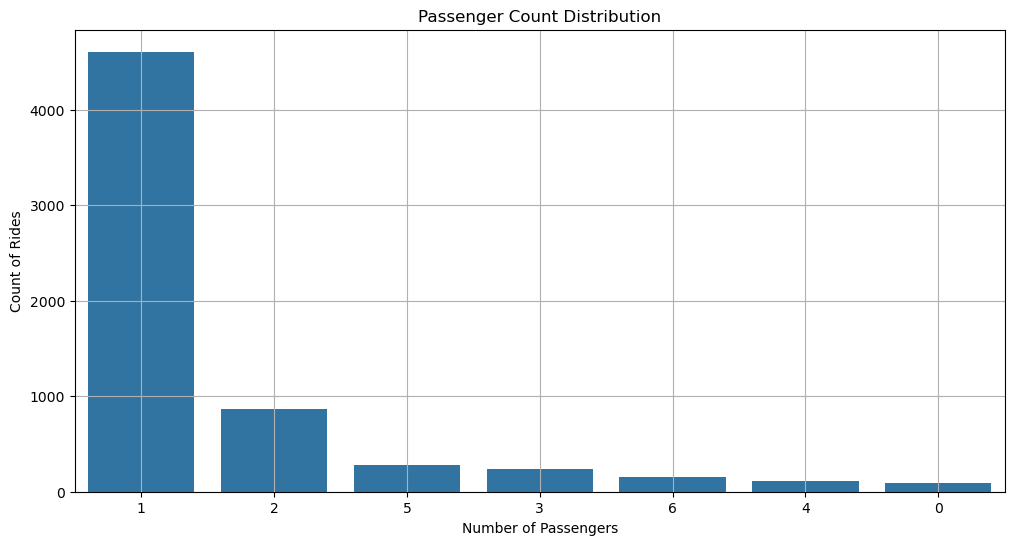

In [331]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='passengers', order=df['passengers'].value_counts().index)
plt.title('Passenger Count Distribution')
plt.xlabel('Number of Passengers')
plt.ylabel('Count of Rides')
plt.grid()
plt.show()